In [ ]:
WHEEL_D_mm= 32
PULSES_P_REV = 120

In [29]:
import pandas as pd
# import scipy.optimize
# from tbcontrol.responses import fopdt
# from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np

# raw_data = """pwm_112_14:53:28.csv
# pwm_028_14:57:33.csv
# pwm_056_14:57:37.csv
# pwm_084_14:57:45.csv
# pwm_112_14:57:54.csv
# pwm_112_14:58:14.csv
# pwm_168_14:58:32.csv
# pwm_168_14:58:47.csv
# pwm_224_14:58:58.csv
# pwm_000_14:59:49.csv
# pwm_140_15:00:05.csv
# pwm_140_15:00:15.csv
# pwm_196_15:00:29.csv
# pwm_168_15:03:10.csv
# pwm_224_15:03:54.csv
# pwm_224_15:04:21.csv
# pwm_252_15:04:38.csv
# """

raw_data = """pwm_028_16:15:32.csv"""

data = [pd.read_csv(f"http://192.168.0.168/testes/{file}", delimiter=r"\s+") for file in raw_data.splitlines()]

# data = pd.read_csv("http://192.168.0.168/view", sep=' ')
data = data[0]

In [30]:
data.to_csv(f"include/exp03/{raw_data}")

In [9]:
np.degrees(2*32*np.pi/(120*100))

0.96

<AxesSubplot:>

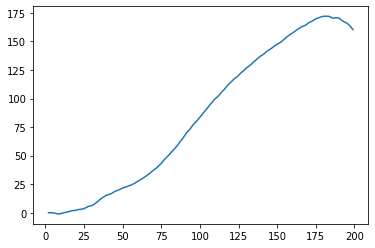

In [31]:
data['Angle'] = (data['Left'] - data['Right']) # *32*np.pi/12000

data['x'], data['y'] = 0, 0

data['dL'], data['dR'] = data['Left'].diff(), data['Right'].diff()

data.loc[0, 'dL'], data.loc[0, 'dR'] = 0, 0

data['Angle'].rolling(3).mean().plot()

<AxesSubplot:>

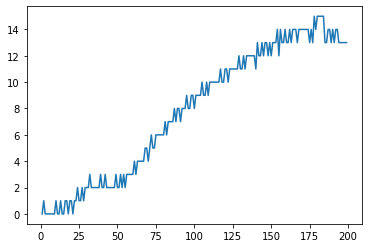

In [35]:
data['Left'].diff().plot()

In [5]:
100/(32/120)

375.0

(-155.35000000000002, 3262.35)

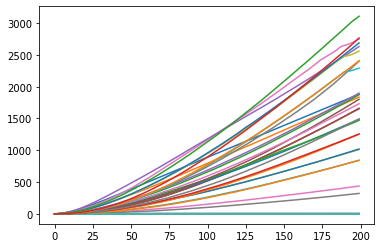

In [20]:
for exp in data:
    plt.plot(exp['Left'])
    plt.plot(exp['Right'])
ax = plt.gca()
ax.set_ylim()

In [21]:
3262*32*np.pi/120

2732.766729602641

(0.04166666666666663, 13.791666666666666)

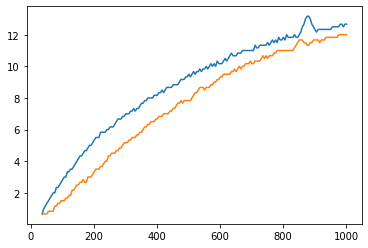

In [21]:
for exp in data:
    plt.plot(exp['Time'], exp['Left'].diff().rolling(6).mean())
    plt.plot(exp['Time'], exp['Right'].diff().rolling(6).mean())
    # plt.plot(exp['Time'].diff())
ax = plt.gca()
ax.set_ylim()

In [26]:
30*32*np.pi/(5*120) 

5.026548245743669

250

In [23]:
(5*120*2)/(32*np.pi)

11.93662073189215

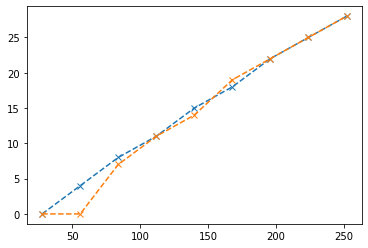

In [59]:
left_gain = [exp['Left'].diff().iloc[-1] for exp in data]

plt.plot(np.arange(28, 253, 28), left_gain, '--x')

right_gain = [exp['Right'].diff().iloc[-1] for exp in data]

plt.plot(np.arange(28, 253, 28), right_gain, '--x')

In [26]:
data

[     LEFT       RIGHT
 0       1           0
 1       1           0
 2       2           0
 3       3           0
 4       4           0
 ..    ...         ...
 195     0           0
 196     0           0
 197     0           0
 198     0 -2126789407
 199     0  1061163890
 
 [200 rows x 2 columns],
      LEFT       RIGHT
 0       0           0
 1       1           0
 2       2           0
 3       4           0
 4       6           0
 ..    ...         ...
 195     0           0
 196     0           0
 197     0           0
 198     0 -2126789407
 199     0  1061163890
 
 [200 rows x 2 columns],
      LEFT       RIGHT
 0       0           1
 1       1           1
 2       3           2
 3       5           4
 4       8           6
 ..    ...         ...
 195     0           0
 196     0           0
 197     0           0
 198     0 -2126789407
 199     0  1061163890
 
 [200 rows x 2 columns],
      LEFT       RIGHT
 0       1           0
 1       2           1
 2       4           2

In [5]:
pd.read_csv("http://192.168.0.168/exp01/pwm_140_16:38:16.csv", sep=' ')

,LEFT,RIGHT
0,1,1
1,2,1
2,4,2
3,7,4
4,11,6
...,...,...
79,1225,1038
80,1240,1052
81,1255,1066
82,1270,1081


In [30]:
data = pd.read_csv("http://192.168.0.168/view", sep=' ')
data

,LEFT
0,3752
1,65AC
2,9260
3,A0E1
4,BF49
...,...
165,4E888
166,4EDB3
167,4F31F
168,4F871


In [17]:
data = pd.read_clipboard()

In [31]:
data = data['LEFT'].astype('str').apply(lambda x: int(x, 16))

In [32]:
data

0       14162
1       26028
2       37472
3       41185
4       48969
        ...  
165    321672
166    322995
167    324383
168    325745
169    326925
Name: LEFT, Length: 170, dtype: int64

In [1]:
300000/170

1764.7058823529412

In [11]:
500/1200

0.4166666666666667

In [5]:
65000/65530

0.9919121013276362

In [29]:
800 / 120

6.666666666666667

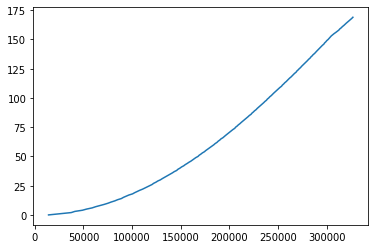

In [39]:
plt.plot(data, data.index)

<AxesSubplot:>

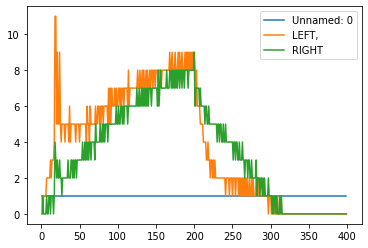

In [45]:
data = pd.read_csv("include/teste01.csv")
data.diff().plot()

In [46]:
ym = data["LEFT"].rolling(10).mean().diff().dropna()[:350]

ts = np.arange(350)

KeyError: 'LEFT'

In [43]:
def resultplot(K, tau, theta, y0):
    plt.plot(data["LEFT"].rolling(10).mean().diff()[:350])
    plt.plot(ts, fopdt(ts, K, tau, theta, y0), color='red')
    plt.show()

In [44]:
interact(resultplot,
         K=(1., 10.),
         tau=(50., 300.),
         theta=(0., 10.),
         y0=(0., 0.));

interactive(children=(FloatSlider(value=5.5, description='K', max=10.0, min=1.0), FloatSlider(value=175.0, des…

In [35]:
[K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, ts, ym, [6.4, 108, 0.6, 0])
[K, tau, theta, y0]

[8.200213715008774,
 115.28034796738272,
 -45.85721911165457,
 -1.7150673651548802]

<AxesSubplot:>

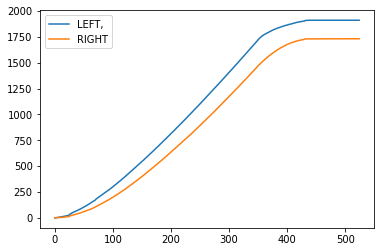

In [17]:
new_data.plot()

<AxesSubplot:>

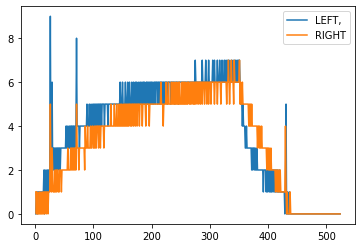

In [12]:
new_data.diff().plot()

<AxesSubplot:>

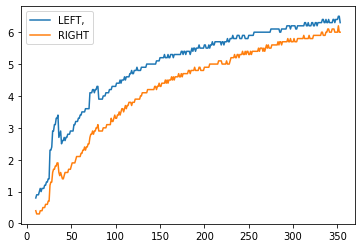

In [27]:
speed = new_data.rolling(10).mean().diff()
speed[:354].plot()

In [4]:
new_data.to_csv("include/teste02.csv")

<AxesSubplot:>

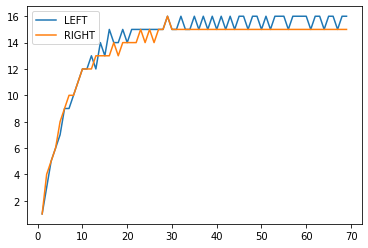

In [10]:
data[:70].diff().plot()

In [17]:
data_track = pd.read_clipboard(", ")
data_track

,LEFT,RIGHT
0,0,0
1,1,1
2,2,1
3,2,1
4,3,1
...,...,...
95,706,548
96,718,558
97,730,569
98,741,580


<AxesSubplot:>

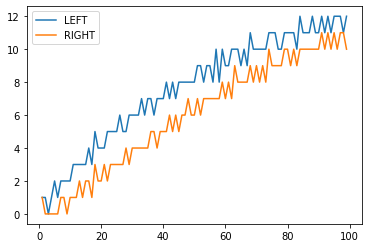

In [18]:
data_track.diff().plot()

In [19]:
data_complete = pd.read_clipboard()
data_complete

,"LEFT,",RIGHT
0,0,0
1,1,0
2,1,1
3,2,1
4,2,1
...,...,...
395,1526,1450
396,1526,1450
397,1526,1450
398,1526,1450
